Задача 1.Отбор признаков с использованием корреляционных матриц.

Корреляция — это статистическая мера, которая указывает на степень взаимосвязи между двумя переменными. В контексте анализа данных, корреляция помогает понять, как одна переменная изменяется по отношению к другой. Значение корреляции варьируется от -1 до 1, где:

1 указывает на полную положительную корреляцию,
-1 указывает на полную отрицательную корреляцию,
0 указывает на отсутствие корреляции.

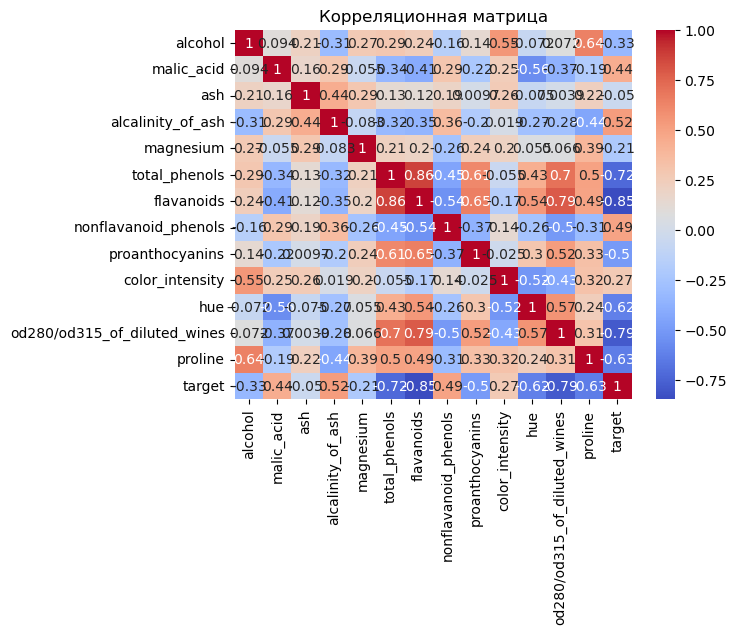

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine_data = datasets.load_wine()

dataframe = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

dataframe['target'] = wine_data.target

correlation_matrix = dataframe.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

corr_target = correlation_matrix['target']
best_features = corr_target[corr_target.abs() > 0.5].index.tolist()
best_features.remove('target')

x = dataframe[best_features]
y = dataframe['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = LogisticRegression(max_iter=200, solver="liblinear", random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accurancy", accuracy, "MSE", mse)

Accurancy 0.9444444444444444 MSE 0.05555555555555555


Задание 2: Отбор признаков на основе важности признаков в случайном лесе.
Алгоритм случайного леса (Random Forest) — универсальный алгоритм машинного обучения, суть которого состоит в использовании ансамбля решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается. Также это один из немногих алгоритмов, который можно использовать в абсолютном большинстве задач.
Благодаря своей гибкости Random Forest применяется для решения практически любых проблем в области машинного обучения. Сюда относятся классификации (RandomForestClassifier) и регрессии (RandomForestRegressor), а также более сложные задачи, вроде отбора признаков, поиска выбросов/аномалий и кластеризации.

In [3]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd


wine_data = load_wine()

x = wine_data.data
y = wine_data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
model = RandomForestRegressor(n_estimators=10, random_state=1)
model.fit(x_train, y_train)


importance_df = pd.DataFrame({"Признак": wine_data.feature_names, "Важность": model.feature_importances_}).sort_values(by="Важность", ascending=False)

print(importance_df)


                         Признак  Важность
12                       proline  0.322074
11  od280/od315_of_diluted_wines  0.281604
6                     flavanoids  0.139758
9                color_intensity  0.104643
0                        alcohol  0.089061
10                           hue  0.053852
7           nonflavanoid_phenols  0.002506
5                  total_phenols  0.001211
2                            ash  0.001196
3              alcalinity_of_ash  0.001124
8                proanthocyanins  0.001123
1                     malic_acid  0.001064
4                      magnesium  0.000784


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

best_features = importance_df['Признак'].head(5).tolist()
best_features_id = [wine_data.feature_names.index(feature) for feature in best_features]

x_train, x_test = x_train[:, best_features_id], x_test[:, best_features_id]

model = LogisticRegression(max_iter=100, solver='liblinear', random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)

print("Accurancy", accuracy, "MSE", mse)

Accurancy 0.8611111111111112 MSE 0.1388888888888889


Задание 3: Использование выбора признаков на основе p-value.
https://habr.com/ru/companies/skillfactory/articles/510688/
https://proglib.io/p/linear-regression

Гипотеза 0. Уровень бедности(LSTAT) не кореллирует с ценой жилья(MEDV).
Альтернативная. Чем выше уровень бедности тем ниже цена.

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

boston_data = pd.read_csv("datasets/boston_house_prices.csv")

x = boston_data.drop(columns=["MEDV"])
y = boston_data["MEDV"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = sm.OLS(y_train, x_train)
res = model.fit()

p_values = res.pvalues
print(p_values)

y_pred = res.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print("MSE", mse)


const      6.688728e-11
CRIM       2.017744e-03
ZN         8.425756e-03
INDUS      3.954389e-01
CHAS       4.053212e-01
NOX        1.239572e-06
RM         1.337726e-17
AGE        6.704154e-01
DIS        1.047933e-10
RAD        5.711969e-05
TAX        1.249601e-03
PTRATIO    1.729283e-12
B          7.885749e-03
LSTAT      9.496265e-16
dtype: float64
MSE 26.34553736331315


Получили таблицу, все  p_value < 0.05 следовательно все признаки статистически значимы

Задание 4: Отбор признаков с помощь метода взаимной информации.
https://habr.com/ru/articles/550978/
Классификация -- это предсказание дискретной (категориальной) функции (например, определить пол человека по его изображению), а регрессия -- это предсказание непрерывной функции (например, определить возраст человека по его изображению).

## Пример для `mutual_info_classif` (Классификация)

### Ситуация из жизни:
Представьте, что вы работаете в медицинской сфере и хотите предсказать, болен ли пациент (да/нет) на основе его данных: возраст, уровень сахара в крови, индекс массы тела (ИМТ) и другие показатели.

- **Целевая переменная (y)**: Болен или нет (дискретное значение: 0 или 1).
- **Признаки (X)**: Возраст, уровень сахара в крови, ИМТ и т.д.

### Как работает `mutual_info_classif`:
- Функция оценивает, сколько информации каждый признак (например, возраст или уровень сахара) даёт о том, болен ли пациент.
- Например:
  - Если уровень сахара в крови сильно коррелирует с заболеванием (например, диабетом), то его взаимная информация будет высокой.
  - Если возраст почти не связан с вероятностью болезни, то его взаимная информация будет низкой.


## Пример для `mutual_info_regression` (Регрессия)

### Ситуация из жизни:
Теперь представьте, что вы работаете в сфере недвижимости и хотите предсказать цену дома на основе его характеристик: количество комнат, площадь дома, расстояние до центра города и т.д.

- **Целевая переменная (y)**: Цена дома (непрерывное значение, например, $200,000).
- **Признаки (X)**: Количество комнат, площадь дома, расстояние до центра города и т.д.

### Как работает `mutual_info_regression`:
- Функция оценивает, сколько информации каждый признак даёт о цене дома.
- Например:
  - Если площадь дома сильно связана с ценой (чем больше площадь, тем выше цена), то её взаимная информация будет высокой.
  - Если расстояние до ближайшей школы почти не влияет на цену дома в этом районе, то её взаимная информация будет низкой.

In [6]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

scores = mutual_info_classif(x_train, y_train)
print(scores)

[0.3574482  0.11646553 0.37688843 0.36141186 0.08159257 0.23393526
 0.37392399 0.44364044 0.08409906 0.01286316 0.2507591  0.01179952
 0.26057533 0.33400094 0.01528524 0.08167175 0.1548805  0.1343394
 0.0600573  0.05970601 0.45385746 0.15155632 0.46489054 0.45353798
 0.09912354 0.27977831 0.34260199 0.44696502 0.10212352 0.04974145]


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accurancy", accuracy, "MSE", mse)

Accurancy 0.9649122807017544 MSE 0.03508771929824561


Задание 5: Используйте метод Recursive Feature Elimination на том же датасете.
Постройте модель, например, линейную регрессию или SVM, и используйте
RFE для выбора лучшего подмножества признаков.
https://habr.com/ru/companies/otus/articles/528676/

In [8]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') 
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(x_train, y_train)

print("Признаки по важности:", rfe.ranking_)
print("Лучшие:", rfe.support_)

Признаки по важности: [ 1 10 15 26 14 20  1  2 11 12  4  8  3  7 24 17 16 21 22 25  1  9  5 23
 19  6  1  1 18 13]
Лучшие: [ True False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False  True  True False False]


In [9]:
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)
model.fit(x_train_selected, y_train)

y_pred = model.predict(x_test_selected)
y_proba = model.predict_proba(x_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9122807017543859


6 Задание

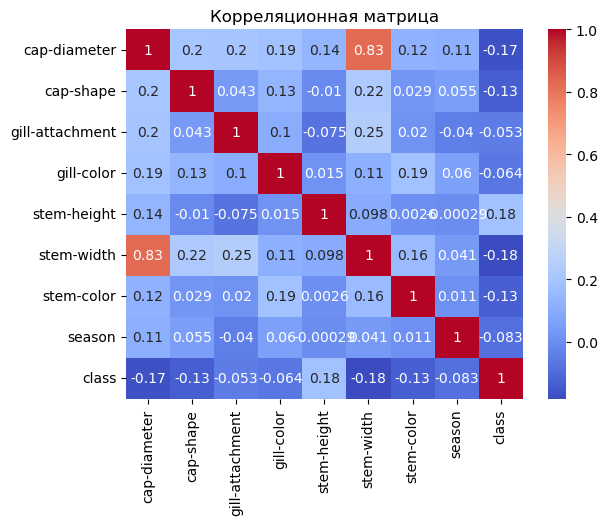

Accurancy 0.6335708337188859 MSE 0.3664291662811141


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

mushroom_data = pd.read_csv("datasets/mushroom_cleaned.csv")

correlation_matrix = mushroom_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

corr_target = correlation_matrix['class']
best_features = corr_target[corr_target.abs() > 0.1].index.tolist()
best_features.remove('class')

x = mushroom_data[best_features]
y = mushroom_data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = LogisticRegression(max_iter=200, solver="liblinear", random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accurancy", accuracy, "MSE", mse)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

mushroom_data = pd.read_csv("datasets/mushroom_cleaned.csv")

x = mushroom_data.drop(columns='class')
y = mushroom_data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
model = RandomForestRegressor(n_estimators=10, random_state=1)
model.fit(x_train, y_train)

importance_df = pd.DataFrame({"Признак": x.columns, "Важность": model.feature_importances_}).sort_values(by="Важность", ascending=False)

print(importance_df)

best_features = importance_df['Признак'].head(5).tolist()

x_train, x_test = x_train[best_features], x_test[best_features]

model = LogisticRegression(max_iter=100, solver='liblinear', random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)

print("Accurancy", accuracy, "MSE", mse)

           Признак  Важность
5       stem-width  0.232554
2  gill-attachment  0.170047
6       stem-color  0.146650
4      stem-height  0.136121
3       gill-color  0.127760
0     cap-diameter  0.081095
1        cap-shape  0.072271
7           season  0.033502
Accurancy 0.6068289071897844 MSE 0.3931710928102156


In [12]:

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

boston_data = pd.read_csv("datasets/mushroom_cleaned.csv")

x = boston_data.drop(columns="class")
y = boston_data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = sm.Logit(y_train, x_train)
res = model.fit()

p_values = res.pvalues
print(p_values)

y_pred = res.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print("MSE", mse)


Optimization terminated successfully.
         Current function value: 0.636011
         Iterations 5
const              6.434048e-233
cap-diameter        4.815853e-10
cap-shape           7.847373e-75
gill-attachment     3.045893e-02
gill-color          2.783316e-03
stem-height         0.000000e+00
stem-width          1.029415e-46
stem-color         2.169645e-107
season              3.157407e-44
dtype: float64
MSE 0.22275538306344056


In [13]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

mushroom_data = pd.read_csv("datasets/mushroom_cleaned.csv")

x = mushroom_data.drop(columns="class")
y =mushroom_data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

scores = mutual_info_classif(x_train, y_train)
print(scores)

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accurancy", accuracy, "MSE", mse)

[0.02876326 0.0260047  0.0207044  0.02267677 0.04280667 0.06614059
 0.05551799 0.01241769]
Accurancy 0.6370870731933006 MSE 0.36291292680669934


In [14]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mushroom_data = pd.read_csv("datasets/mushroom_cleaned.csv")

x = mushroom_data.drop(columns="class") 
y =  mushroom_data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = LogisticRegression(solver='liblinear') 
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(x_train, y_train)

print("Признаки по важности:", rfe.ranking_)
print("Лучшие:", rfe.support_)

x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)
model.fit(x_train_selected, y_train)

y_pred = model.predict(x_test_selected)
y_proba = model.predict_proba(x_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Признаки по важности: [4 1 1 2 1 3 1 1]
Лучшие: [False  True  True False  True False  True  True]
Accuracy: 0.6045155917460905
